Performing Exploratory Data analysis (EDA) on the data file.
The steps would involve:

    1. Import Libraries and Load the Data
    2. Inspect the Data
    3. Handle Missing Values
    4. Check for Duplicate Rows
    5. Data Visualization
    6. Outlier Detection
    7. Feature Engineering
    8. Time Series Data
    9. Save the Cleaned Data
    10. Summarize the findings


About Data:
Data is acquired from survey, Ideally it has 222 columns more comments on the columns are documented on the Excel sheet.
the idea is to understand the possible deciding factors that makes IBT to decide to quit their current IBT position to nonIBT position.
the current paper has proven its hyothesis using COR and CH framework using :structural equation modeling (SEM) and latent moder-
ated structural equation modeling (LMS)

understanding on how to convert this set up to ML suitable model and prove/disprove hypothesis is the task

In [2]:
import pandas as pd

file_data=pd.read_csv('wavedata.csv', encoding='utf-8') #fails due to mismatched encoding
# file_data = pd.read_csv('wavedata.csv', encoding='latin1')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 5: unexpected end of data

Using Latin-1 (ISO-8859-1) encoding for data.
Use Latin-1 for comments if:

Your dataset is limited to Western European characters.
You are working with legacy systems or need compatibility with older databases.
Performance or memory efficiency is critical.
For modern and scalable solutions, however, UTF-8 is generally recommended.

But as the document follows the standard of Latin-1 or 'encoding': 'ISO-8859-1' hence this will be default for the project, henceforth.

In [3]:
# Validating the encoding after utf-8 failed.
!pip install chardet

import chardet

# Detect encoding
with open('wavedata.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Result from the above code for documentation:
{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

STEP 1: Import Libraries and Load the Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with the detected encoding
df = pd.read_csv('wavedata.csv', encoding='ISO-8859-1')

# Display the data to verify it loads correctly
print(df.head())


   travfreq  aircrew  empl  jobsat1  jobsat2  jobsat3  roleover1  roleover2  \
0         3      2.0     1        4        4        4          3          4   
1         3      2.0     1        4        4        5          4          4   
2         3      2.0     1        4        3        3          4          4   
3         3      2.0     1        4        4        4          2          3   
4         4      2.0     1        4        4        4          3          4   

   roleover3  workadj1  ...  yearstravel  numbertravel  daysknowtravel  \
0          4         5  ...          1.0             1              10   
1          4         5  ...          1.0             3              14   
2          4         4  ...          3.0             1              30   
3          4         4  ...          5.0             1              15   
4          3         4  ...         15.0             1              14   

   meettravel  flytravel   countrytravel  daystrip  reasontrip  \
0           2 

In [5]:
print((df.columns).to_list())
column_count=(df.columns).to_list()
print(df.count())

['travfreq', 'aircrew', 'empl', 'jobsat1', 'jobsat2', 'jobsat3', 'roleover1', 'roleover2', 'roleover3', 'workadj1', 'workadj2', 'workadj3', 'workadj4', 'workadj5', 'workadj6', 'workadj7', 'workadj8', 'workadj9', 'turnover1', 'turnover2', 'turnover3', 'wneglect1', 'wneglect2', 'wneglect3', 'wneglect4', 'wneglect5', 'wneglect6', 'wsitcon1', 'wsitcon2', 'wsitcon3', 'wsitcon4', 'wrclar1', 'wrclar2', 'wrclar3', 'wrclar4', 'wrclar5', 'wrclar6', 'wtimepres1', 'wtimepres2', 'wtimepres3', 'wtimepres4', 'wnovel1', 'wnovel2', 'wnovel3', 'wnovel4', 'wcowinsexphelp 1', 'wcowinsexphelp 2', 'wcowinsexphelp 3', 'wcowinsexphelp 4', 'wroleconflict 1', 'wroleconflict 2', 'wroleconflict 3', 'wintconflictd 1', 'wintconflictd 2', 'wintconflictd 3', 'wintconflictd 4', 'wintconflictf 1', 'wintconflictf 2', 'wintconflictf 3', 'wemotdem 1', 'wemotdem 2', 'wemotdem 3', 'wemotdem 4', 'wemotdem 5', 'wpeopresp1', 'wpeopresp2', 'wpeopresp3', 'wpeopresp4', 'wpeopresp5', 'wallcowexp1', 'wallcowexp2', 'wallcowexp3', 'w

In [6]:
a=['travfreq', 'aircrew', 'empl', 'jobsat1', 'jobsat2', 'jobsat3', 'roleover1', 'roleover2', 'roleover3', 'workadj1', 'workadj2', 'workadj3', 'workadj4', 'workadj5', 'workadj6', 'workadj7', 'workadj8', 'workadj9', 'turnover1', 'turnover2', 'turnover3', 'wneglect1', 'wneglect2', 'wneglect3', 'wneglect4', 'wneglect5', 'wneglect6', 'wsitcon1', 'wsitcon2', 'wsitcon3', 'wsitcon4', 'wrclar1', 'wrclar2', 'wrclar3', 'wrclar4', 'wrclar5', 'wrclar6', 'wtimepres1', 'wtimepres2', 'wtimepres3', 'wtimepres4', 'wnovel1', 'wnovel2', 'wnovel3', 'wnovel4', 'wcowinsexphelp 1', 'wcowinsexphelp 2', 'wcowinsexphelp 3', 'wcowinsexphelp 4', 'wroleconflict 1', 'wroleconflict 2', 'wroleconflict 3', 'wintconflictd 1', 'wintconflictd 2', 'wintconflictd 3', 'wintconflictd 4', 'wintconflictf 1', 'wintconflictf 2', 'wintconflictf 3', 'wemotdem 1', 'wemotdem 2', 'wemotdem 3', 'wemotdem 4', 'wemotdem 5', 'wpeopresp1', 'wpeopresp2', 'wpeopresp3', 'wpeopresp4', 'wpeopresp5', 'wallcowexp1', 'wallcowexp2', 'wallcowexp3', 'wallcowexp4', 'wallcowexp5', 'wallcowexp6', 'wallcowexp7', 'wallcowexp8', 'wallcowexp9', 'wallcowexp10', 'wallcowexp11', 'wallcowexp12', 'cowint', 'cowdep', 'wteams', 'wcom', 'Unnamed: 85', 'fsat1', 'fsat2', 'fsat3', 'fneglect1', 'fneglect2', 'fneglect3', 'fneglect4', 'fneglect5', 'fneglect6', 'fadj1', 'fadj2', 'fadj3', 'fadj4', 'fadj5', 'fadj6', 'fadj7', 'fadj8', 'fadj9', 'wfc1', 'wfc2', 'wfc3', 'wfc4', 'wfc5', 'ftimepres1', 'ftimepres2', 'ftimepres3', 'ftimepres4', 'check2', 'faminstexp1', 'faminstexp2', 'faminstexp3', 'faminstexp4', 'femotdem1', 'femotdem2', 'femotdem3', 'femotdem4', 'froleover1', 'froleover2', 'froleover3', 'froleconf1', 'froleconf2', 'froleconf3', 'fintconfd1', 'fintconfd2', 'fintconfd3', 'fintconfd4', 'fintconff1', 'fintconff2', 'fintconff3', 'famallexp1', 'famallexp2', 'famallexp3', 'famallexp4', 'famallexp5', 'famallexp6', 'famallexp7', 'famallexp8', 'famallexp9', 'famallexp10', 'famallexp11', 'famallexp12', 'burn1', 'burn2', 'burn3', 'burn4', 'burn5', 'burn6', 'burn7', 'burn8', 'burn9', 'burn10', 'burn11', 'burn12', 'burn13', 'burn14', 'burn15', 'burn16', 'burn17', 'burn18', 'burn19', 'burn20', 'burn21', 'supsup1', 'cowsup1', 'parsup1', 'famsup1', 'supsup2', 'cowsup2', 'parsup2', 'famsup2', 'supsup3', 'cowsup3', 'parsup3', 'famsup3', 'supsup4', 'cowsup4', 'parsup4', 'famsup4', 'cogflex1', 'cogflex2', 'cogflex3', 'cogflex4', 'cogflex5', 'cogflex6', 'cogflex7', 'cogflex8', 'cogflex9', 'cogflex10', 'cogflex11', 'cogflex12', 'houswork', 'childwork', 'marstat', 'children', 'whours', 'tenure', 'position', 'education', 'gender', 'age', 'industry', 'otherindustry', 'nationality', 'residence', 'lang', 'feeltravel', 'yearstravel', 'numbertravel', 'daysknowtravel', 'meettravel', 'flytravel', 'countrytravel', 'daystrip', 'reasontrip', 'otherreasontrip', 'weekendtrip']
print(len(a))

222


STEP 2: Inspect the Data

Questions to answer:
    1. Shape:
        Number of rows and columns: Shape of dataset: (579, 222)
    2. Data Types:
        Identify numeric, categorical, and datetime columns.
    3. Missing Values:
        Count and percentage of missing values in each column.
    4. Summary Statistics:
        Get an overview of the data distribution.

In [7]:
# Shape and info
print(f"Shape of dataset: {df.shape}")
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)

Shape of dataset: (579, 222)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 222 entries, travfreq to weekendtrip
dtypes: float64(18), int64(187), object(17)
memory usage: 1004.3+ KB
None
         travfreq  aircrew   empl     jobsat1     jobsat2     jobsat3  \
count  579.000000    524.0  579.0  579.000000  579.000000  579.000000   
mean     3.447323      2.0    1.0    4.243523    4.234888    4.217617   
std      0.881513      0.0    0.0    0.834655    0.827778    0.772114   
min      2.000000      2.0    1.0    1.000000    1.000000    1.000000   
25%      3.000000      2.0    1.0    4.000000    4.000000    4.000000   
50%      3.000000      2.0    1.0    4.000000    4.000000    4.000000   
75%      4.000000      2.0    1.0    5.000000    5.000000    5.000000   
max      5.000000      2.0    1.0    5.000000    5.000000    5.000000   

        roleover1   roleover2   roleover3    workadj1  ...   education  \
count  579.000000  579.000000  579.000000  579.

In [8]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [9]:
print('The actual count of missing values in the dataset, to get an estimate of which column contains the most missing values')

df[df.columns[df.isnull().any()]].isnull().sum()

The actual count of missing values in the dataset, to get an estimate of which column contains the most missing values


aircrew             55
turnover1            1
turnover2            2
turnover3            3
wneglect1            2
wneglect2            4
wneglect3            1
wneglect4            2
wneglect5            2
wneglect6            3
wpeopresp3           3
wpeopresp4           2
wpeopresp5           3
wteams               1
wcom                 2
houswork             2
childwork            7
whours               2
tenure              15
education            3
industry             1
otherindustry      468
nationality          5
residence            5
lang               108
countrytravel        1
daystrip             2
otherreasontrip    541
dtype: int64

In [10]:
df = df.drop(columns=['otherindustry','lang','otherreasontrip','aircrew'])

In [11]:
print('After deleting columns after discussion')

df[df.columns[df.isnull().any()]].isnull().sum()

After deleting columns after discussion


turnover1         1
turnover2         2
turnover3         3
wneglect1         2
wneglect2         4
wneglect3         1
wneglect4         2
wneglect5         2
wneglect6         3
wpeopresp3        3
wpeopresp4        2
wpeopresp5        3
wteams            1
wcom              2
houswork          2
childwork         7
whours            2
tenure           15
education         3
industry          1
nationality       5
residence         5
countrytravel     1
daystrip          2
dtype: int64

In [12]:
df['tenure'].dtype
df['tenure'] = pd.to_numeric(df['tenure'])
df['tenure'].dtype

dtype('float64')

In [13]:
if df['tenure'].dtype in [float, int]:  # Ensure the column is numeric
    df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
else:
    print("'tenure' is not numeric and cannot be filled with mean.")

In [14]:
print('After imputing missing values of tenure with avg value ')

df[df.columns[df.isnull().any()]].isnull().sum()

After imputing missing values of tenure with avg value 


turnover1        1
turnover2        2
turnover3        3
wneglect1        2
wneglect2        4
wneglect3        1
wneglect4        2
wneglect5        2
wneglect6        3
wpeopresp3       3
wpeopresp4       2
wpeopresp5       3
wteams           1
wcom             2
houswork         2
childwork        7
whours           2
education        3
industry         1
nationality      5
residence        5
countrytravel    1
daystrip         2
dtype: int64

In [15]:
print('The percentatge of missing values in the dataset, to get an estimate of which column contains the most missing values and make a decision on how to fill them')
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]


The percentatge of missing values in the dataset, to get an estimate of which column contains the most missing values and make a decision on how to fill them


turnover1        0.172712
turnover2        0.345423
turnover3        0.518135
wneglect1        0.345423
wneglect2        0.690846
wneglect3        0.172712
wneglect4        0.345423
wneglect5        0.345423
wneglect6        0.518135
wpeopresp3       0.518135
wpeopresp4       0.345423
wpeopresp5       0.518135
wteams           0.172712
wcom             0.345423
houswork         0.345423
childwork        1.208981
whours           0.345423
education        0.518135
industry         0.172712
nationality      0.863558
residence        0.863558
countrytravel    0.172712
daystrip         0.345423
dtype: float64

Based on the result:
1. otherreasontrip    : 93%
2. otherindustry      : 80%
3. lang               : 18%
4. aircrew            : 9%
5. tenure             : 2%
6. childwork          : 1%

Are above zero, hence the priority of dealing the columns missing values is documented.

This is now handled and the statistics are different as above.


1. otherreasontrip    : 93%   need details on how to fill the null values
2. otherindustry      : 80%   need to understand if this is important field and if that can be filled with a meaning full value
3. lang               : 18%   need to undertand meaningful value to fill it with
4. aircrew            : 9%    I believe this isnt priority, need confirmation
5. tenure             : 2%    default value? or just drop?
6. childwork          : 1%     need info on the column 



Info that I miss to understand :

yearstravel	how long one has travelled IBT
numbertravel	not sure
daysknowtravel	info about travek provided before
meettravel meetings on IBT
daystrip	how long each trip avg
reasontrip	ignore
otherreasontrip	ignore
weekendtrip week end trip o not
			

Things to do:

write a proposal
    what do i need for this:
    -understanding how to translate the current model to ML
    -variables to be used
    -interpret latent variables
    -evaluation, y variable, x variable, ML task?

Missing value filling:
-how and which



Data preprocessing:

creating a new column, based on row wise avg of the relevant columns.

The columns transformed are listed below:
1. jobsat1	jobsat2	jobsat3--->  average_jobsat
2. roleover1	roleover2	roleover3 --->  average_roleover
3. workadj1	workadj2	workadj3	workadj4	workadj5	workadj6	workadj7	workadj8	workadj9 --->average_workadj
4. turnover1	turnover2	turnover3 ---> average_turnover
5. wneglect1	wneglect2	wneglect3	wneglect4	wneglect5	wneglect6---> average_wneglect
6.wsitcon1	wsitcon2	wsitcon3	wsitcon4 ---> average_wsitcon
7.wrclar1	wrclar2	wrclar3	wrclar4	wrclar5	wrclar6 ---> average_wrclar
8.wtimepres1	wtimepres2	wtimepres3	wtimepres4 --->average_wtimepres
9. wnovel1	wnovel2	wnovel3	wnovel4 --->average_wnovel
10.wcowinsexphelp 1	wcowinsexphelp 2	wcowinsexphelp 3	wcowinsexphelp 4  --->average_wcowinsexphelp
11.wroleconflict 1	wroleconflict 2	wroleconflict 3--->average_wroleconflict
12.wintconflictd 1	wintconflictd 2	wintconflictd 3	wintconflictd 4-->average_wintconflictd
13. wintconflictf 1	wintconflictf 2	wintconflictf 3 --->average_wintconflictf
14. wemotdem 1	wemotdem 2	wemotdem 3	wemotdem 4	wemotdem 5 --->average_wemotdem
15. wpeopresp1	wpeopresp2	wpeopresp3	wpeopresp4	wpeopresp5 --->average_wpeopresp
16. famallexp11	famallexp2	famallexp3	famallexp4	famallexp5	famallexp6	famallexp7	famallexp8	famallexp9	famallexp10	famallexp11	famallexp12 --->average_famallexp
17. wallcowexp1	wallcowexp2	wallcowexp3	wallcowexp4	wallcowexp5	wallcowexp6	wallcowexp7	wallcowexp8	wallcowexp9	wallcowexp10	wallcowexp11	wallcowexp12 --->average_wallcowexp
18. burn1	burn2	burn3	burn4	burn5	burn6	burn7	burn8	burn9	burn10	burn11	burn12	burn13	burn14	burn15	burn16	burn17	burn18	burn19	burn20	burn21 --->average_burn
19. cogflex1	cogflex2	cogflex3	cogflex4	cogflex5	cogflex6	cogflex7	cogflex8	cogflex9	cogflex10	cogflex11	cogflex12 --->average_cogflex
20. supsup1	cowsup1	parsup1	famsup1	supsup2	cowsup2	parsup2	famsup2	supsup3	cowsup3	parsup3	famsup3	supsup4	cowsup4	parsup4	famsup4 --->average_
21.fsat1	fsat2	fsat3 --->average_fsat
22.fneglect1	fneglect2	fneglect3	fneglect4	fneglect5	fneglect6 --->average_fneglect
23.fadj1	fadj2	fadj3	fadj4	fadj5	fadj6	fadj7	fadj8	fadj9 --->average_fadj
24. wfc1	wfc2	wfc3	wfc4	wfc5 --->average_wfc
25.ftimepres1	ftimepres2	ftimepres3	ftimepres4 --->average_ftimepres
26.faminstexp1	faminstexp2	faminstexp3	faminstexp4 --->average_faminstexp
27.femotdem1	femotdem2	femotdem3	femotdem4--->average_femotdem
28.froleover1	froleover2	froleover3 --->average_froleover
29.froleconf1	froleconf2	froleconf3 --->average_froleconf
30.fintconfd1	fintconfd2	fintconfd3	fintconfd4 --->average_fintconfd
31.fintconff1	fintconff2	fintconff3 --->average_fintconff


In [17]:
# Create a new column with the row-wise average
df['average_jobsat'] = df[['jobsat1', 'jobsat2', 'jobsat3']].mean(axis=1)

In [18]:
df['average_roleover'] = df[['roleover1', 'roleover2', 'roleover3']].mean(axis=1)

In [19]:
df['average_workadj'] = df[['workadj1',	'workadj2'	,'workadj3'	,'workadj4'	,'workadj5'	,'workadj6'	,'workadj7',	'workadj8',	'workadj9']].mean(axis=1)

In [20]:
df['average_turnover'] = df[['turnover1', 'turnover2', 'turnover3']].mean(axis=1)

In [21]:
df['average_wneglect'] = df[['wneglect1', 'wneglect2', 'wneglect3','wneglect4','wneglect5','wneglect6']].mean(axis=1)

In [22]:
df['average_wsitcon'] = df[['wsitcon1', 'wsitcon2', 'wsitcon3','wsitcon4']].mean(axis=1)

In [23]:
df['average_wrclar'] = df[['wrclar1', 'wrclar2', 'wrclar3','wrclar4','wrclar5','wrclar6']].mean(axis=1)

In [24]:
df['average_wtimepres'] = df[['wtimepres1', 'wtimepres2', 'wtimepres3','wtimepres4']].mean(axis=1)

In [25]:
df['average_wnovel'] = df[['wnovel1', 'wnovel2', 'wnovel3','wnovel4']].mean(axis=1)

In [26]:
df['average_wcowinsexphelp'] = df[['wcowinsexphelp 1', 'wcowinsexphelp 2', 'wcowinsexphelp 3','wcowinsexphelp 4']].mean(axis=1)

In [27]:
df['average_wroleconflict'] = df[['wroleconflict 1', 'wroleconflict 2', 'wroleconflict 3']].mean(axis=1)

In [28]:
df['average_wintconflictd'] = df[['wintconflictd 1', 'wintconflictd 2', 'wintconflictd 3','wintconflictd 4']].mean(axis=1)

In [29]:
df['average_wintconflictf'] = df[['wintconflictf 1', 'wintconflictf 2', 'wintconflictf 3']].mean(axis=1)

In [30]:
df['average_wemotdem'] = df[['wemotdem 1', 'wemotdem 2', 'wemotdem 3','wemotdem 4','wemotdem 5']].mean(axis=1)

In [31]:
df['average_wpeopresp'] = df[['wpeopresp1', 'wpeopresp2', 'wpeopresp3','wpeopresp4','wpeopresp5']].mean(axis=1)

In [32]:
df['average_wallcowexp'] = df[['wallcowexp1'	,'wallcowexp2',	'wallcowexp3'	,'wallcowexp4'	,'wallcowexp5',	'wallcowexp6',	'wallcowexp7',	'wallcowexp8'	,'wallcowexp9'	,'wallcowexp10'	,	'wallcowexp11', 'wallcowexp12']].mean(axis=1)

In [33]:
df['average_famallexp'] = df[['famallexp1'	,'famallexp2',	'famallexp3'	,'famallexp4'	,'famallexp5',	'famallexp6',	'famallexp7',	'famallexp8'	,'famallexp9'	,'famallexp10'	,	'famallexp11','famallexp12']].mean(axis=1)

In [34]:
df['average_burn'] = df[['burn1',	'burn2','burn3'	,'burn4'	,'burn5',	'burn6',	'burn7'	,'burn8'	,'burn9'	,'burn10'	,'burn11',	'burn12',	'burn13'	,'burn14',	'burn15',	'burn16'	,'burn17'	,'burn18',	'burn19',	'burn20',	'burn21']].mean(axis=1)

In [35]:
df['average_cogflex'] = df[['cogflex1',	'cogflex2',	'cogflex3'	,'cogflex4'	,'cogflex5',	'cogflex6',	'cogflex7',	'cogflex8'	,'cogflex9',	'cogflex10',	'cogflex11'	,'cogflex12']].mean(axis=1)

In [36]:
df['average_supsup'] = df[['supsup1',	'supsup2',	'supsup3'	,'supsup4']].mean(axis=1)
df['average_cowsup'] = df[['cowsup1',	'cowsup2',	'cowsup3'	,'cowsup4']].mean(axis=1)
df['average_parsup'] = df[['parsup1',	'parsup2',	'parsup3'	,'parsup4']].mean(axis=1)
df['average_famsup'] = df[['famsup1',	'famsup2',	'famsup3'	,'famsup4']].mean(axis=1)

In [37]:
df['average_fadj'] = df[['fadj1','fadj2','fadj3','fadj4','fadj5','fadj6','fadj7','fadj8','fadj9']].mean(axis=1)


In [38]:
df['average_fsat'] = df[['fsat1',	'fsat2',	'fsat3']].mean(axis=1)
df['average_fneglect'] = df[['fneglect1',	'fneglect2',	'fneglect3'	,'fneglect4','fneglect5','fneglect6']].mean(axis=1)

In [39]:
df['average_wfc'] = df[['wfc1',	'wfc2',	'wfc3'	,'wfc4','wfc5']].mean(axis=1)

In [40]:
df['average_ftimepres'] = df[['ftimepres1',	'ftimepres2',	'ftimepres3','ftimepres4']].mean(axis=1)
df['average_faminstexp'] = df[['faminstexp1',	'faminstexp2',	'faminstexp3'	,'faminstexp4']].mean(axis=1)
df['average_femotdem'] = df[['femotdem1','femotdem2','femotdem3','femotdem4']].mean(axis=1)


In [41]:
df['average_froleover'] = df[['froleover1',	'froleover2',	'froleover3']].mean(axis=1)
df['average_froleconf'] = df[['froleconf1',	'froleconf2',	'froleconf3']].mean(axis=1)
df['average_fintconfd'] = df[['fintconfd1',	'fintconfd2',	'fintconfd3','fintconfd4']].mean(axis=1)
df['average_fintconff'] = df[['fintconff1',	'fintconff2',	'fintconff3']].mean(axis=1)

In [42]:
df.to_csv('output.csv', index=False)

one hot encoding:

empl-fulltime-parttime

In [43]:
encoded_df = pd.get_dummies(df, columns=['empl','gender'])


In [44]:
encoded_df.to_csv('test.csv', index=False)

Todo:
Decide the ML models variabtions to create
class vs reg
include other data o not?

Girt hypothesis to prove inbetween the variables:
x:
Work instrumental support expectations (T1) 
Work relational support expectations (T1) 
Work role overload (T1) 
Work emotional demands (T1)

y:
Work role adjustment (T1)

The columns from above depicts the image in the paper, which translates to the following columns on the data:


x
(positive)
wcowinsexphelp 1 
wallcowexp1
(negative)
roleover1
wemotdem 1

y:
workadj1

In [45]:
# Step 1: Load the CSV
file_path = "test.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specify the columns you want to keep for ML
selected_columns = ['wcowinsexphelp 1', 'wallcowexp1', 'roleover1', 'wemotdem 1','workadj1']  
filtered_data = data[selected_columns]

In [ ]:
filtered_data

In [47]:
correlation_matrix = filtered_data.corr(method='pearson')  # Use 'spearman' for ranked data
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                   wcowinsexphelp 1  wallcowexp1  roleover1  wemotdem 1  \
wcowinsexphelp 1          1.000000     0.428032   0.358653    0.367064   
wallcowexp1               0.428032     1.000000   0.223258    0.391992   
roleover1                 0.358653     0.223258   1.000000    0.142467   
wemotdem 1                0.367064     0.391992   0.142467    1.000000   
workadj1                  0.075683     0.175507   0.015965    0.205213   

                  workadj1  
wcowinsexphelp 1  0.075683  
wallcowexp1       0.175507  
roleover1         0.015965  
wemotdem 1        0.205213  
workadj1          1.000000  


In [64]:
import pandas as pd

# Assuming `data` is your DataFrame with features and target
correlations = filtered_data.corr()["workadj1"].sort_values(ascending=False)

# Display correlation of each feature with the target
print("Correlation of features with workadj1  :")
print(correlations)

Correlation of features with workadj1  :
workadj1            1.000000
wemotdem 1          0.205213
wallcowexp1         0.175507
wcowinsexphelp 1    0.075683
roleover1           0.015965
Name: workadj1, dtype: float64


Correlation Results:
workadj1: Correlation of 1 with itself (as expected).
wemotdem 1: Correlation of 0.2052 — This indicates a weak positive relationship with workadj1. As wemotdem 1 increases, workadj1 also tends to increase, but the relationship is weak.
wallcowexp1: Correlation of 0.1755 — Another weak positive correlation. The relationship between wallcowexp1 and workadj1 is weak, meaning both variables tend to increase together, but the correlation is not strong.
wcowinsexphelp 1: Correlation of 0.0757 — This indicates an extremely weak positive relationship. There is very little correlation between wcowinsexphelp 1 and workadj1, meaning that changes in wcowinsexphelp 1 are almost unrelated to changes in workadj1.
roleover1: Correlation of 0.01597 — This indicates an almost negligible positive relationship, suggesting that there is no meaningful relationship between roleover1 and workadj1.
Conclusion:
Weak Positive Relationships: wemotdem 1 and wallcowexp1 show weak positive correlations with workadj1, meaning that they have a slight tendency to increase along with workadj1.
Very Weak or Negligible Relationships: wcowinsexphelp 1 and roleover1 show very weak or almost negligible relationships with workadj1. This suggests that these features do not have much influence on workadj1.

In [48]:
# Features and target
X = filtered_data.drop(columns=['workadj1'])
y = filtered_data['workadj1']


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.52


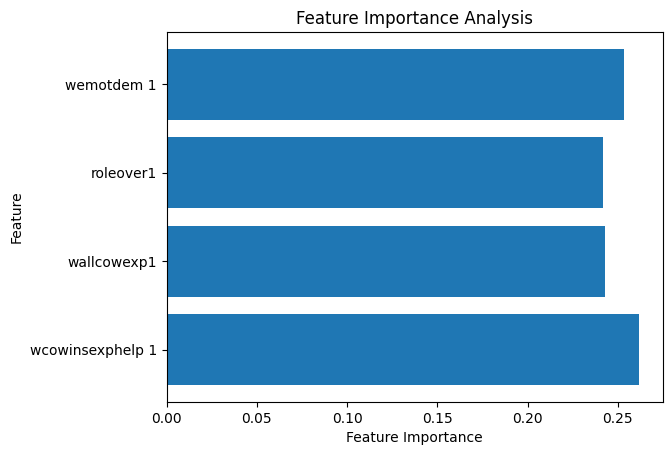

In [50]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Mean Squared Error: 0.41


Updating the hyperpameters to the best possible set of values:

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Mean Squared Error: 0.41

Reason being the current value of MSE is 0.52 
and after the grid search the possible mse value has dropped to 0.41

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf=2, min_samples_split=5,n_estimators=50)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.41


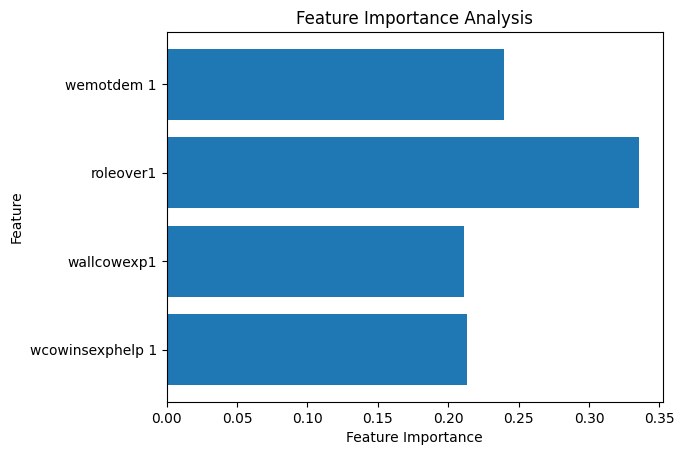

In [53]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [54]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.52


 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [55]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.44


Analysis of Results
Training MSE: 0.44

The error on the training data is 0.44, indicating the model performs well on data it has already seen.
This suggests the model is learning patterns in the data effectively.
Cross-Validated MSE: 0.52

The error during cross-validation is slightly higher than the training error.
This is expected as cross-validation evaluates the model on unseen subsets of the data.
A small difference (0.08 in this case) between training and cross-validation MSE suggests low overfitting and a good generalization capability.
Test MSE (Actual Model): 0.41

The model performs better on the test set compared to training (MSE of 0.41 vs. 0.44).
This might indicate:
Random variation in the specific test set used.
The test set might contain easier-to-predict data compared to the training set

Correlation Analysis
Your goal is to prove a correlation between the survey questions (features) and the outcome variable (workadj1). 

Feature Importance (Correlation Proxy)

Random Forests provide a measure of feature importance, which acts as a proxy for correlation.
Highly important features contribute more to predictions and are thus more strongly correlated with workadj1.
If you have already calculated feature importances:

In [56]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


            Feature  Importance
2         roleover1    0.335384
3        wemotdem 1    0.239906
0  wcowinsexphelp 1    0.213250
1       wallcowexp1    0.211460


Global Correlation Insights

While Random Forests are non-linear models, you can compute Pearson correlation coefficients between each feature and the target (workadj1) to check for linear relationships.

In [57]:
correlations = X.join(y).corr()['workadj1']
print(correlations.sort_values(ascending=False))


workadj1            1.000000
wemotdem 1          0.205213
wallcowexp1         0.175507
wcowinsexphelp 1    0.075683
roleover1           0.015965
Name: workadj1, dtype: float64


Summary
Strong Correlation:

The model's relatively low MSE (compared to the 1-5 range of your data) indicates that the features (survey responses) correlate well with workadj1.
Balanced Learning:

The consistent error across training, cross-validation, and testing suggests the model generalizes well and is not overfitting.
Key Drivers:

Feature importance and correlation analysis can identify which questions (or combinations) contribute most to the predictions.  

In [58]:
!pip install shap


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ------------------------- -------------- 286.7/456.1 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------- ------------------------------ 0.6/2.7 MB 19.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.7 MB 13.6 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.7 MB 13.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.9/2.7 MB 13.1 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.7 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/28.1 MB 23.4 MB/s eta 0:00:02
   -- ------------------------------------- 1.6/28.1 MB 17.3 MB/s eta 0:00:02
   --- -----


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

C:\Users\reema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


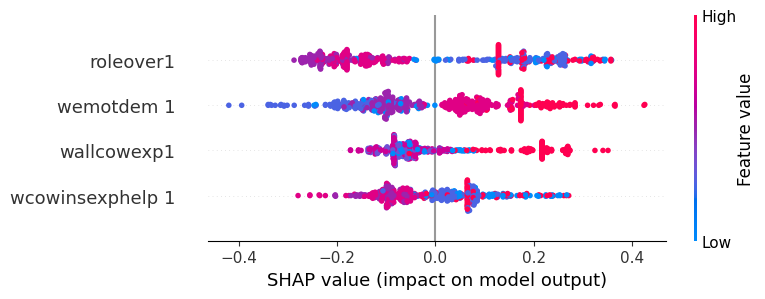

In [59]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


Summary Plot: Displays the average impact of each feature across all predictions.
Dependence Plot: Visualizes the relationship between a single feature and the target:
python

            Feature  Importance
2         roleover1    0.335384
3        wemotdem 1    0.239906
0  wcowinsexphelp 1    0.213250
1       wallcowexp1    0.211460


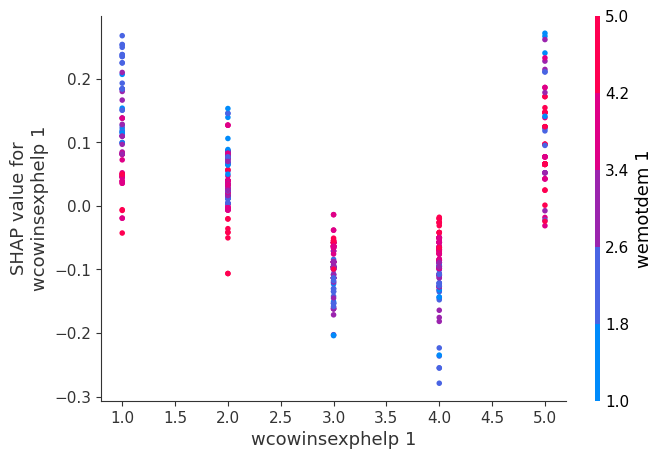

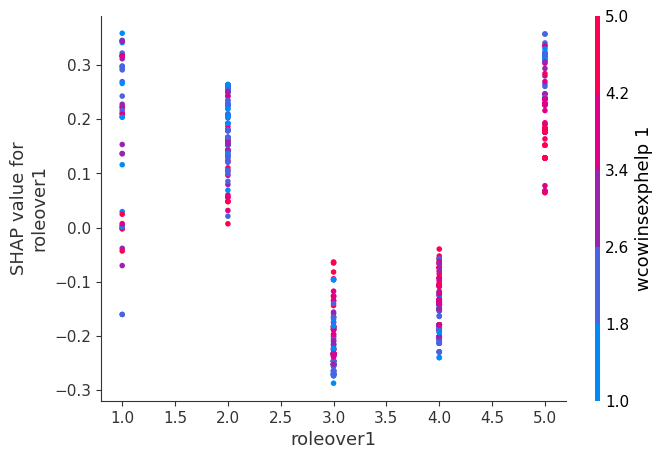

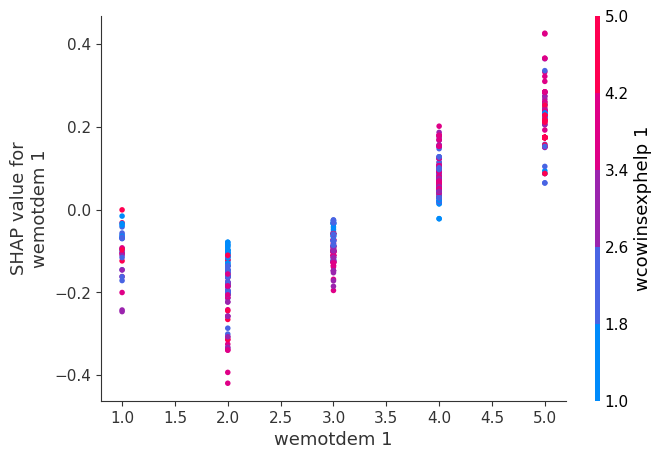

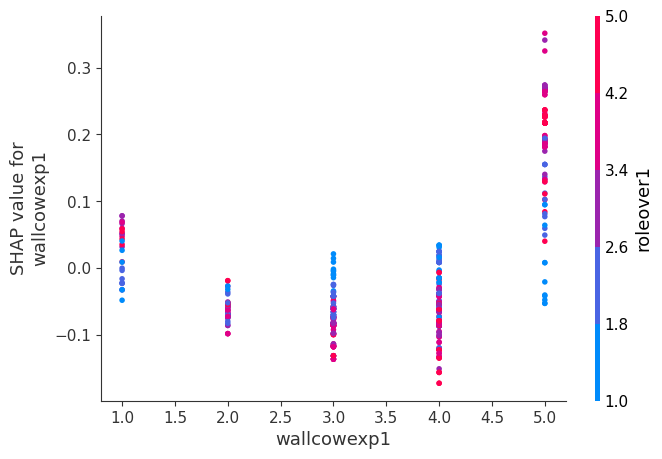

In [62]:
shap.dependence_plot('wcowinsexphelp 1', shap_values, X)
shap.dependence_plot('roleover1', shap_values, X)
shap.dependence_plot('wemotdem 1', shap_values, X)

shap.dependence_plot('wallcowexp1', shap_values, X)



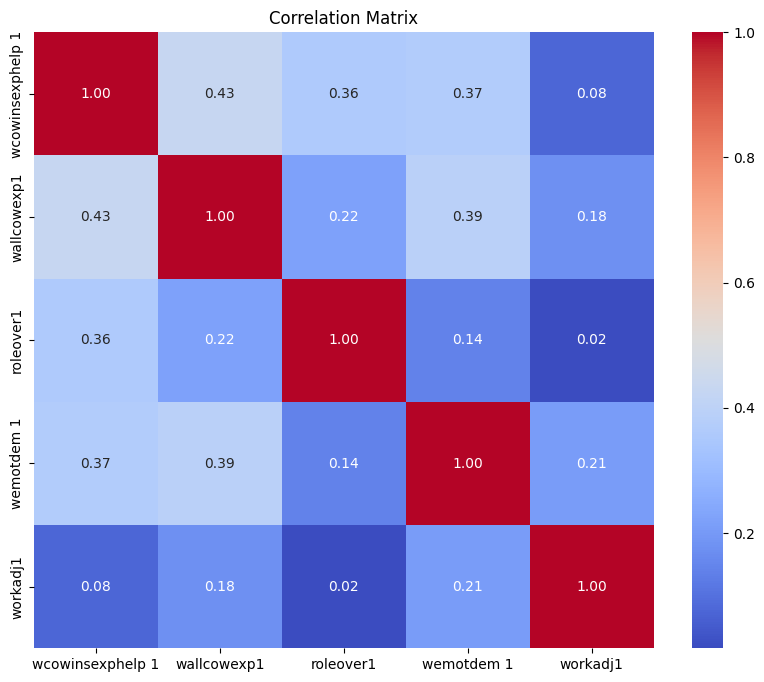

In [63]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features = ['faminstexp1', 'femotdem1', 'famallexp1', 'froleover1']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("fadj1")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()
